# Titanic: Machine Learning from Disaster

## Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

## Objective

Predict what sorts of people were likely to survive.

## Table of contents

- [Notebook](#Notebook)
- [Python général](#Python-général)
    - [List](#List)
    - [Dict](#Dict)
    - [Divers](#Divers)
- [Numpy](#Numpy)
- [Matplotlib](#Matplotlib)
- [Seaborn](#Seaborn)
- [Pandas](#Pandas)
- [Sklearn](#Sklearn)
    - [Simple GS](#Simple-GS)
    - [Multi pipelines, multi parameters with lists](#Multi-pipelines-multi-parameters-with-lists)
    - [Multi pipelines, multi params with Dicts](#Multi-pipelines-multi-parameters-with-dicts)
    - [Multi pipelines, multi params with dataframes](#Multi-pipelines-multi-parameters-with-dataframes)
    - [Learning curve & Validation curve](#Learning-curve-&-Validation-curve)  
    - [Confusion Matrix](#Confusion-Matrix)  
    - [Multiple scoring metrics basic](#Multiple-scoring-metrics-basic)
    - [Multiple scoring metrics advanced](#Multiple-scoring-metrics-advanced)
    - [EZ Multi pipelines & params & some scores calculations](#EZ-Multi-pipelines-&-params-&-some-scores-calculations)
    - [Obtention des resultats](#Obtention-des-resultats)
- [Tensorflow](#Tensorflow)

Importing a DataFrame
Visualize the Data
Cleanup and Transform the Data
Encode the Data
Split Training and Test Sets
Fine Tune Algorithms
Cross Validate with KFold
Upload to Kaggle

## First look at the data

### Import Libraries

In [39]:
# Dataframe
import pandas as pd

# Visualization
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning
import sklearn as sk

### Load data

In [40]:
# Load data directly into a dataframe
df_train=pd.read_csv("Data/Titanic/train.csv")
df_test=pd.read_csv("Data/Titanic/test.csv")

# Get a look at the first rows
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Variable Description
    - Survived: Survived (1) or died (0)
    - Pclass: Passenger's class
    - Name: Passenger's name
    - Sex: Passenger's sex
    - Age: Passenger's age
    - SibSp: Number of siblings/spouses aboard
    - Parch: Number of parents/children aboard
    - Ticket: Ticket number
    - Fare: Fare
    - Cabin: Cabin
    - Embarked: Port of embarkation
    
    Source of information : https://www.kaggle.com/c/titanic/data

### Brief summaries

In [52]:
print("----------------------------------Informations for the training set----------------------------------\n")
df_train.info()
print('\n',df_train.isnull().sum())
print("\n----------------------------------Informations for the testing set ----------------------------------\n")
df_test.info()
print('\n',df_test.isnull().sum())

----------------------------------Informations for the training set----------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null object
Pclass      891 non-null object
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 62.7+ KB

 Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

----------------------------------Informations for the testing set ----------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null object
Name  

Note that:
    - No Survived feature on the testing set
    - Cabin feature is mostly null --> Will be dropped
    - Embarked feature has a few missing values
    - Some Ages are missing --> Will need to be completed or drop the missing rows
    - Survived and Pclass should be treated as object because they are qualitative

In [42]:
# Dropping Cabin, Ticket and PassengerId
df_train=df_train.drop(['Cabin','PassengerId','Ticket'], axis=1)

df_test=df_test.drop(['Cabin','Ticket'], axis=1)

In [43]:
# Changing the type of Pclass and Survived 
df_train['Pclass']=df_train['Pclass'].astype(object)
df_train['Survived']=df_train['Survived'].astype(object)

df_test['Pclass']=df_test['Pclass'].astype(object)

In [44]:
# Basic statistical information about quantitative and qualitative columns

print("----------------------------------Informations for the training set----------------------------------\n")
# Quantitative
display(df_train.describe())
# Qualitative
display(df_train.describe(include=['object']))
print("----------------------------------Informations for the testing set----------------------------------\n")
# Quantitative
display(df_test.describe())
# Qualitative
display(df_test.describe(include=['object']))

----------------------------------Informations for the training set----------------------------------



,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


,Survived,Pclass,Name,Sex,Embarked
count,891,891,891,891,889
unique,2,3,891,2,3
top,0,3,"Harper, Mr. Henry Sleeper",male,S
freq,549,491,1,577,644


----------------------------------Informations for the testing set----------------------------------



,PassengerId,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,30.272590,0.447368,0.392344,35.627188
std,120.810458,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,76.000000,8.000000,9.000000,512.329200


,Pclass,Name,Sex,Embarked
count,418,418,418,418
unique,3,418,2,3
top,3,"Brady, Mr. John Bertram",male,S
freq,218,1,266,270


###  Visualization

#### Getting a better basic understanding of the data

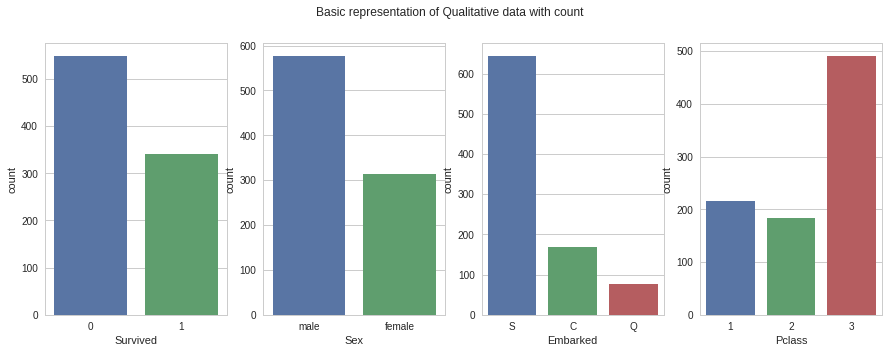

In [88]:
# Qualitative Data
fig, (axis1,axis2,axis3,axis4) = plt.subplots(1,4,figsize=(15,5))
sns.countplot(x='Survived', data=df_train, ax=axis1)
sns.countplot(x='Sex', data=df_train, ax=axis2)
sns.countplot(x='Embarked', data=df_train, ax=axis3)
sns.countplot(x='Pclass', data=df_train, ax=axis4)
fig.suptitle("Basic representation of Qualitative data with count")

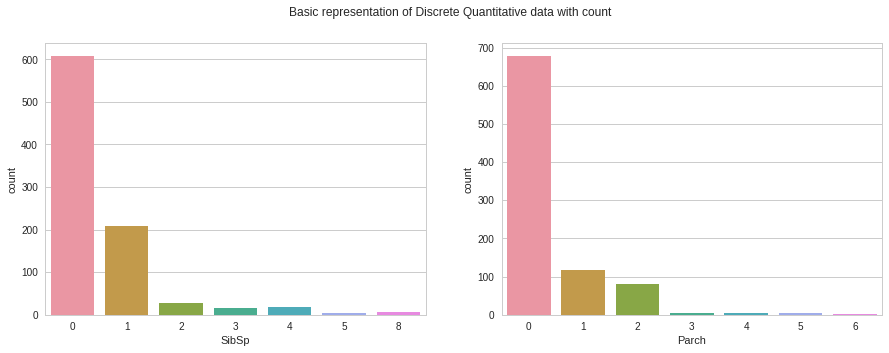

In [90]:
# Discrete Quantitative Data
fig2, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(df_train['SibSp'],ax=axis1)
sns.countplot(df_train['Parch'],ax=axis2)
fig2.suptitle("Basic representation of Discrete Quantitative data with count")


/home/jules/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


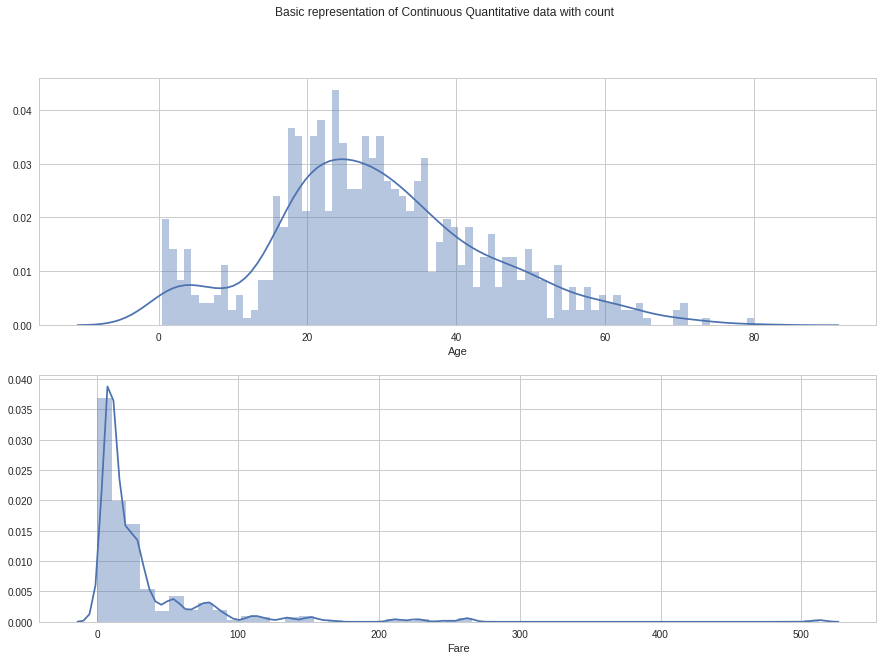

In [107]:
# Continuous Quantitative Data
fig3, (axis1,axis2) = plt.subplots(2,1,figsize=(15,10))
sns.distplot(df_train['Age'].dropna(), bins=80, ax=axis1)
sns.distplot(df_train['Fare'], ax=axis2)
fig3.suptitle("Basic representation of Continuous Quantitative data with probability")

#### Studying features relationship whith the Target feature : Survived

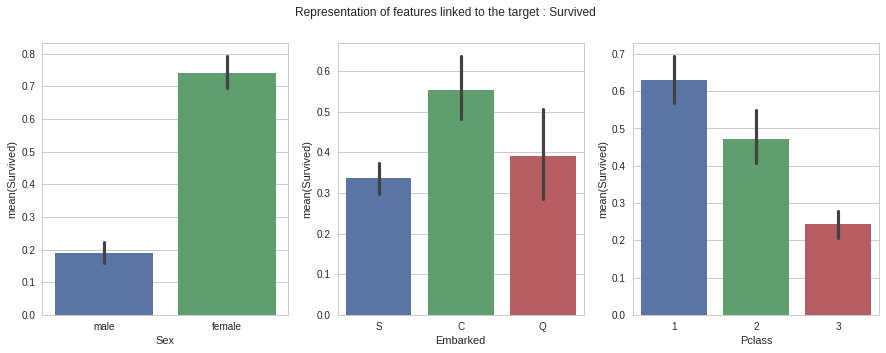

In [118]:
fig4, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.barplot(x='Sex',y='Survived', data=df_train, ax=axis1)
sns.barplot(x='Embarked',y='Survived', data=df_train, ax=axis2)
sns.barplot(x='Pclass',y='Survived', data=df_train, ax=axis3)
fig4.suptitle("Representation of features linked to the target : Survived ")

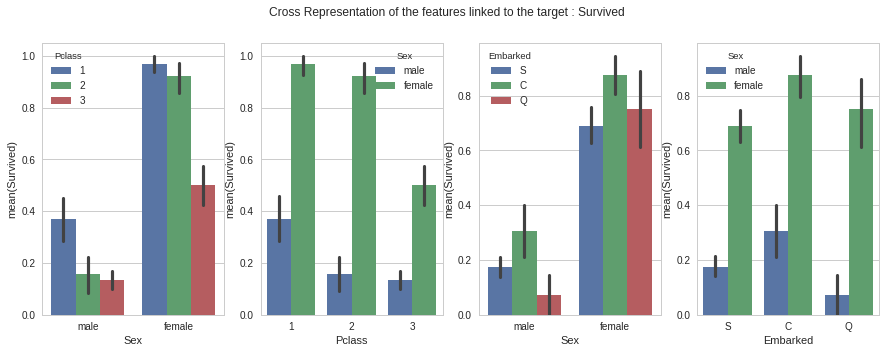

In [121]:
fig5, (axis1,axis2,axis3,axis4) = plt.subplots(1,4,figsize=(15,5))
sns.barplot(x='Sex',y='Survived',hue='Pclass', data=df_train, ax=axis1)
sns.barplot(x='Pclass',y='Survived',hue='Sex', data=df_train, ax=axis2)
sns.barplot(x='Sex',y='Survived',hue='Embarked', data=df_train, ax=axis3)
sns.barplot(x='Embarked',y='Survived',hue='Sex', data=df_train, ax=axis4)
fig5.suptitle("Cross Representation of the features linked to the target : Survived")

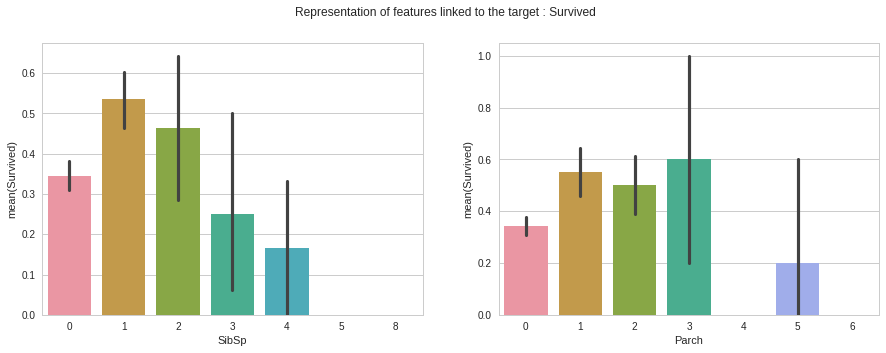

In [124]:
fig6, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='SibSp',y='Survived', data=df_train, ax=axis1)
sns.barplot(x='Parch',y='Survived', data=df_train, ax=axis2)
fig6.suptitle("Representation of features linked to the target : Survived ")

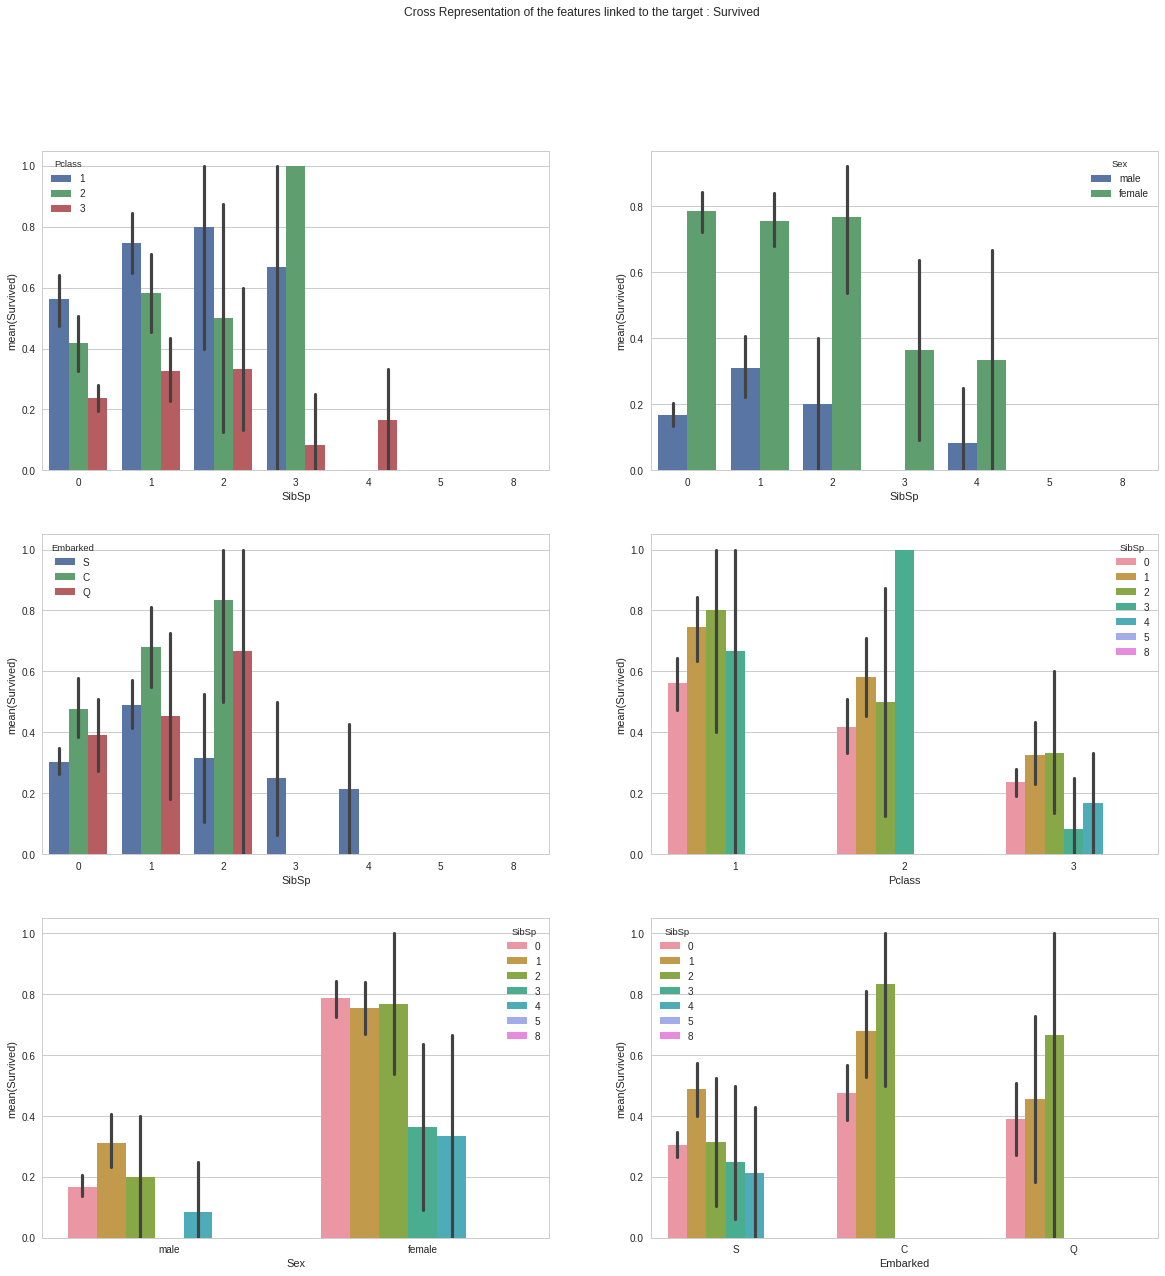

In [131]:
fig7, ((axis1,axis2),(axis3,axis4),(axis5,axis6)) = plt.subplots(3,2,figsize=(20,20))
sns.barplot(x='SibSp',y='Survived',hue='Pclass', data=df_train, ax=axis1)
sns.barplot(x='SibSp',y='Survived',hue='Sex', data=df_train, ax=axis2)
sns.barplot(x='SibSp',y='Survived',hue='Embarked', data=df_train, ax=axis3)
sns.barplot(x='Pclass',y='Survived',hue='SibSp', data=df_train, ax=axis4)
sns.barplot(x='Sex',y='Survived',hue='SibSp', data=df_train, ax=axis5)
sns.barplot(x='Embarked',y='Survived',hue='SibSp', data=df_train, ax=axis6)
fig7.suptitle("Cross Representation of the features linked to the target : Survived")

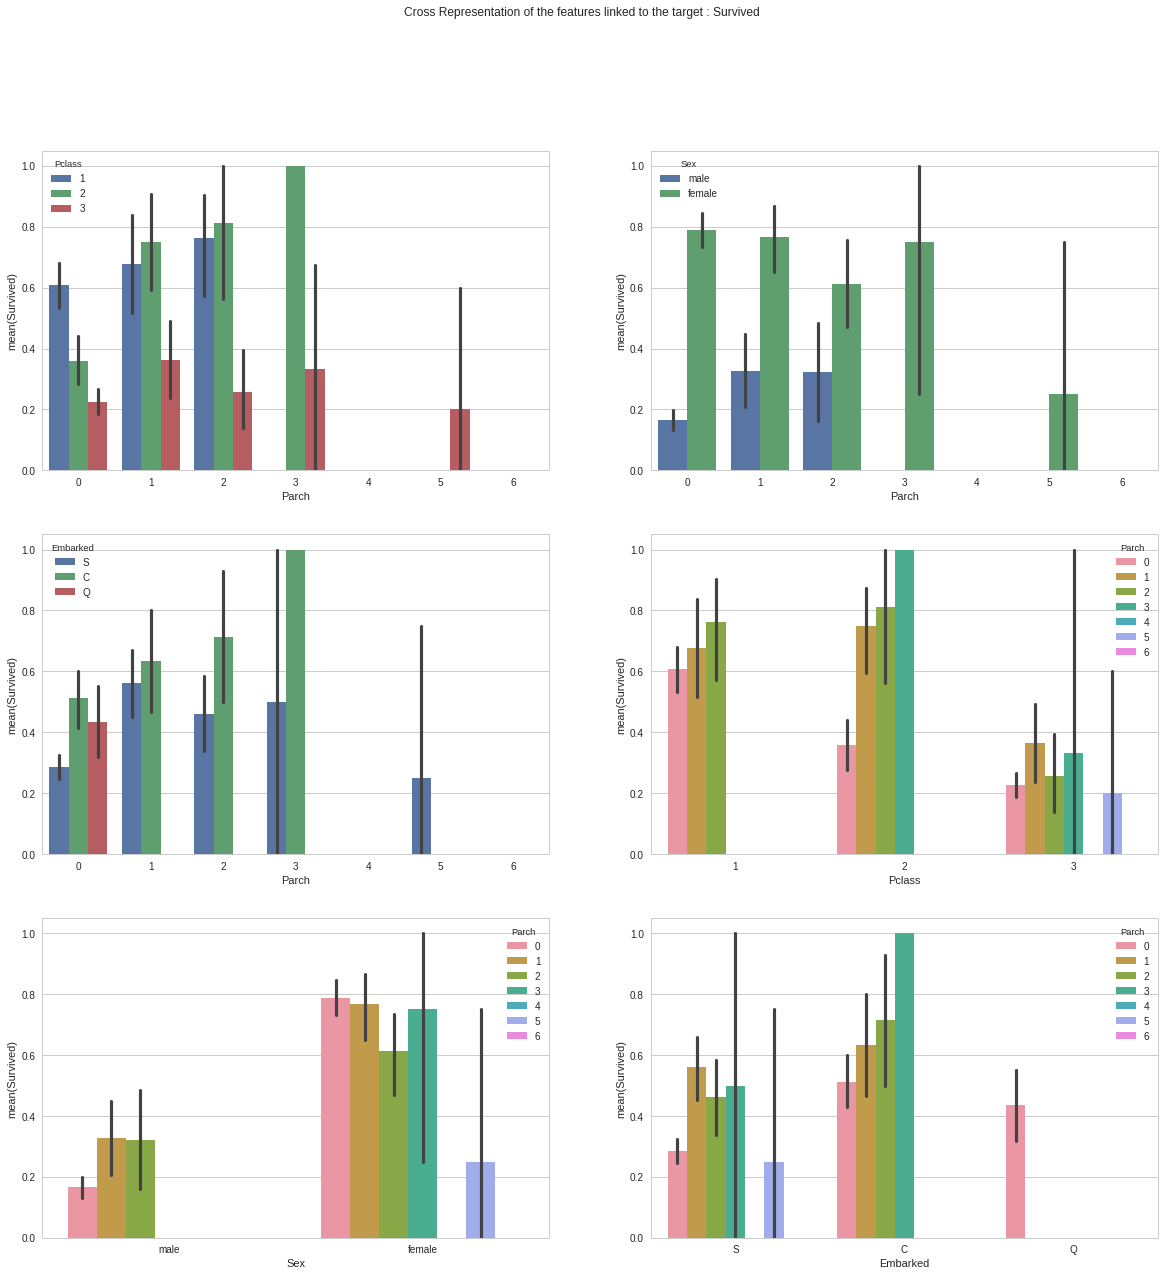

In [132]:
fig7, ((axis1,axis2),(axis3,axis4),(axis5,axis6)) = plt.subplots(3,2,figsize=(20,20))
sns.barplot(x='Parch',y='Survived',hue='Pclass', data=df_train, ax=axis1)
sns.barplot(x='Parch',y='Survived',hue='Sex', data=df_train, ax=axis2)
sns.barplot(x='Parch',y='Survived',hue='Embarked', data=df_train, ax=axis3)
sns.barplot(x='Pclass',y='Survived',hue='Parch', data=df_train, ax=axis4)
sns.barplot(x='Sex',y='Survived',hue='Parch', data=df_train, ax=axis5)
sns.barplot(x='Embarked',y='Survived',hue='Parch', data=df_train, ax=axis6)
fig7.suptitle("Cross Representation of the features linked to the target : Survived")

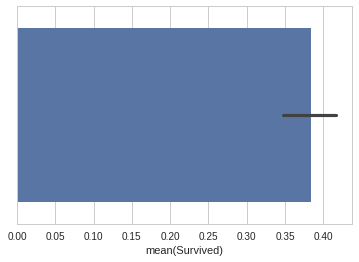

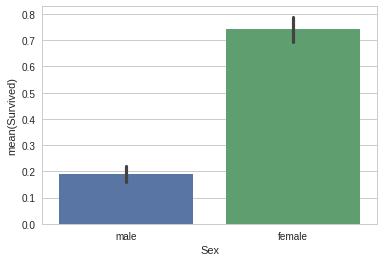

In [58]:
sns.barplot(x='Sex',y='Survived',data=df_train)

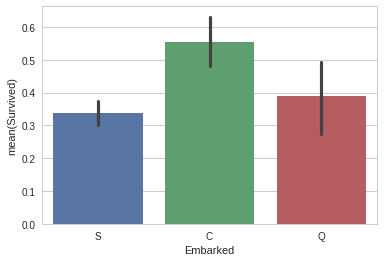

In [57]:
sns.barplot(x='Embarked',y='Survived',data=df_train)

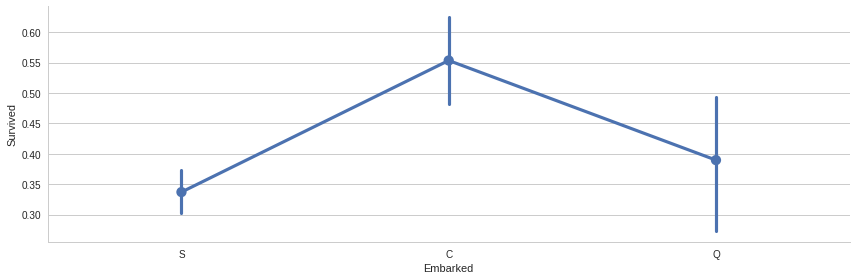

In [54]:
sns.factorplot('Embarked','Survived', data=df_train,size=4,aspect=3)

In [ ]:
# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

In [ ]:
sns.set(font_scale=1)
g = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                    data=titanic, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class')